In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Models:
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 250)
pd.set_option("max_rows", 10)

In [51]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [17]:
df = pd.read_csv('autoscout_cleaned.csv')

In [18]:
df.head()

,price,km,registration,hp_kw,comfort_convenience_air_conditioning,comfort_convenience_air_suspension,comfort_convenience_armrest,comfort_convenience_automatic_climate_control,comfort_convenience_auxiliary_heating,comfort_convenience_cruise_control,comfort_convenience_electric_starter,comfort_convenience_electric_tailgate,comfort_convenience_electrical_side_mirrors,comfort_convenience_electrically_adjustable_seats,comfort_convenience_electrically_heated_windshield,comfort_convenience_heads_up_display,comfort_convenience_heated_steering_wheel,comfort_convenience_hill_holder,comfort_convenience_keyless_central_door_lock,comfort_convenience_leather_seats,comfort_convenience_leather_steering_wheel,comfort_convenience_light_sensor,comfort_convenience_lumbar_support,comfort_convenience_massage_seats,comfort_convenience_multi_function_steering_wheel,comfort_convenience_navigation_system,comfort_convenience_panorama_roof,comfort_convenience_park_distance_control,comfort_convenience_parking_assist_system_camera,comfort_convenience_parking_assist_system_self_steering,comfort_convenience_parking_assist_system_sensors_front,comfort_convenience_parking_assist_system_sensors_rear,comfort_convenience_power_windows,comfort_convenience_rain_sensor,comfort_convenience_seat_heating,comfort_convenience_seat_ventilation,comfort_convenience_split_rear_seats,comfort_convenience_start_stop_system,comfort_convenience_sunroof,comfort_convenience_tinted_windows,comfort_convenience_wind_deflector,comfort_convenience_windshield,safety_security_abs,safety_security_adaptive_cruise_control,safety_security_adaptive_headlights,safety_security_alarm_system,safety_security_blind_spot_monitor,safety_security_central_door_lock,safety_security_central_door_lock_with_remote_control,safety_security_daytime_running_lights,safety_security_driver_drowsiness_detection,safety_security_driver_side_airbag,safety_security_electronic_stability_control,safety_security_emergency_brake_assistant,safety_security_emergency_system,safety_security_fog_lights,safety_security_head_airbag,safety_security_immobilizer,safety_security_isofix,safety_security_led_daytime_running_lights,safety_security_led_headlights,safety_security_lane_departure_warning_system,safety_security_night_view_assist,safety_security_passenger_side_airbag,safety_security_power_steering,safety_security_rear_airbag,safety_security_side_airbag,safety_security_tire_pressure_monitoring_system,safety_security_traction_control,safety_security_traffic_sign_recognition,safety_security_xenon_headlights,extras_alloy_wheels,extras_cab_or_rented_car,extras_catalytic_converter,extras_handicapped_enabled,extras_right_hand_drive,extras_roof_rack,extras_shift_paddles,extras_ski_bag,extras_sliding_door,extras_sport_package,extras_sport_seats,extras_sport_suspension,extras_touch_screen,extras_trailer_hitch,extras_tuned_car,extras_voice_control,extras_winter_tyres,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,previous_owners,warranty,first_registration,nr_of_doors,nr_of_seats,displacement_cc,cylinders,co2_emission_g_co2_km_comb,emission_class,gears,consumption_l_100km_comb,consumption_l_100km_city,consumption_l_100km_country,fuel_diesel,fuel_electric,fuel_electric/gasoline,fuel_gasoline,fuel_others,fuel_gas,make_model_audi_a1,make_model_audi_a2,make_model_audi_a3,make_model_opel_astra,make_model_opel_corsa,make_model_opel_insignia,make_model_renault_clio,make_model_renault_duster,make_model_renault_espace,body_type_compact,body_type_convertible,body_type_coupe,body_type_off_road,body_type_other,body_type_sedans,body_type_station_wagon,body_type_transporter,body_type_van,vat_price_negotiable,vat_vat_deductible,country_version_austria,country_version_belgium,country_version_bu

In [34]:
df.emission_class.value_counts()

6    15919
Name: emission_class, dtype: int64

In [36]:
df = df.drop('emission_class',axis = 1)

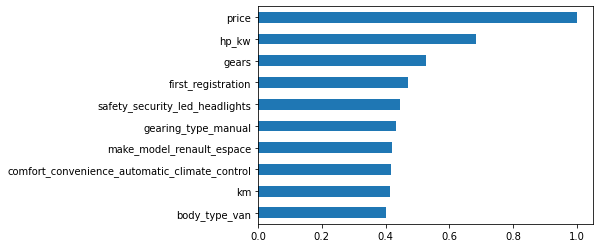

In [38]:
abs(df.corr()["price"]).sort_values().tail(10).plot.barh()

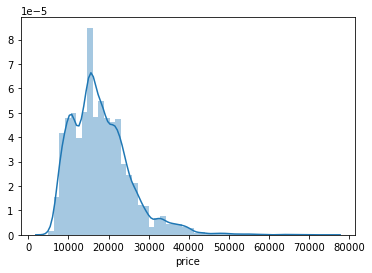

In [39]:
sns.distplot(df.price)

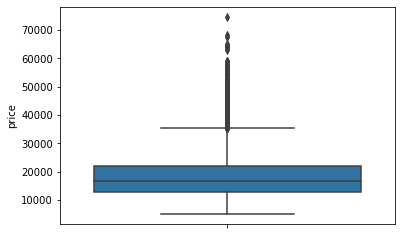

In [40]:
sns.boxplot(df.price, orient="v")

In [44]:
X = df.drop('price', axis=1)
y = df['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
print(X.shape)
print(X_train.shape)

(15919, 201)
(12735, 201)


**1.Linear Regression**

In [53]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8886347117841712 
 mae: 1703.9883164289079 
 mse: 6043796.465576859 
 rmse: 2458.4134041240623


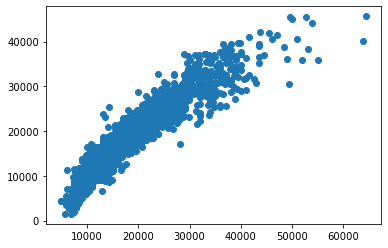

In [54]:
plt.scatter(y_test, y_pred)

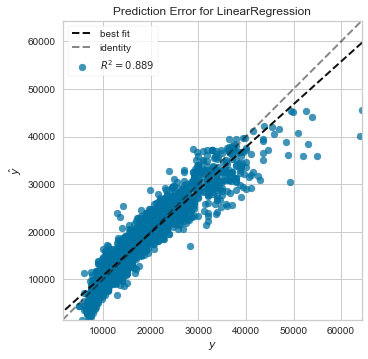

In [55]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

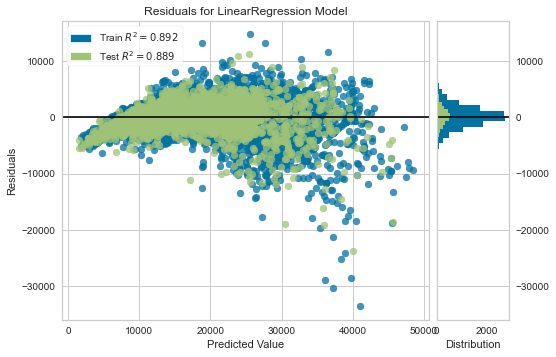

In [56]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [58]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
5265,25288,26807.667850
11403,21222,22052.191216
1483,16445,17010.501664
10356,11400,13400.787907
5094,26998,25839.010705
14960,25990,27679.027794
3501,15990,15512.712663
14521,10690,13517.975752
10625,13990,17816.585084
13285,12490,12056.979058


In [61]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train,cv=10)
cv_scores.mean()

0.8851798393519156

In [62]:
cv_scores

array([0.87543345, 0.8908887 , 0.88467575, 0.88944024, 0.86209289,
       0.89473907, 0.89647045, 0.88770691, 0.88756448, 0.88278644])

**2.Ridge Regression**

In [64]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridge_model = Ridge(normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8348062977567547 
 mae: 2046.175571512866 
 mse: 8965065.594032878 
 rmse: 2994.1719379542783


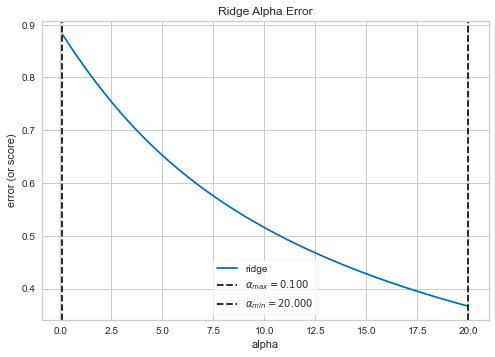

In [67]:
from yellowbrick.regressor import ManualAlphaSelection

alpha_space = np.linspace(0.1, 20, 50)
visualizer = ManualAlphaSelection(Ridge(normalize=True),alphas=alpha_space,cv=5)
visualizer.fit(X_train, y_train)
visualizer.show()

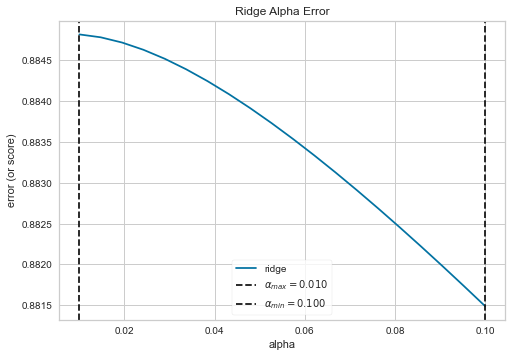

In [68]:
alpha_space = np.linspace(0.01, 0.1,20 )
visualizer = ManualAlphaSelection(Ridge(normalize=True),alphas=alpha_space,cv=5)
visualizer.fit(X_train, y_train)
visualizer.show()

In [69]:
ridge_model = Ridge(0.01, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)


r2_score: 0.8888757325549586 
 mae: 1700.0417892625385 
 mse: 6030716.263424533 
 rmse: 2455.7516697387246


**3 Lasso regression**

In [70]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8793630541807362 
 mae: 1740.830987311516 
 mse: 6546969.513044573 
 rmse: 2558.704655298179


In [71]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)
lasso_cv_model.alpha_

0.1

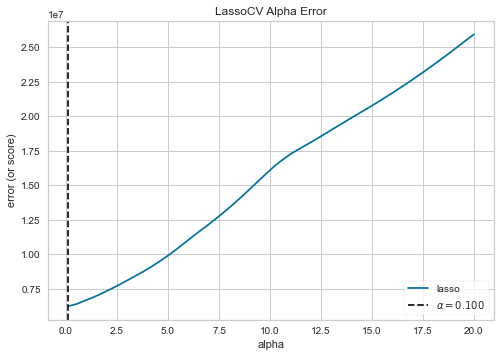

In [72]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

alpha_space = np.linspace(0.1, 20, 50)
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [73]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8891497005134548 
 mae: 1693.5159296621828 
 mse: 6015848.016722454 
 rmse: 2452.7225723107076


In [75]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

153

In [76]:
lasso_model = Lasso(10, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.682666740326743 
 mae: 3149.857676412821 
 mse: 17221682.48248304 
 rmse: 4149.9015027447385


In [77]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

9

In [78]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
123,make_model_renault_espace,2890.632286
105,gears,1622.557263
99,first_registration,1175.636728
191,full_leather,322.944160
59,safety_security_led_headlights,312.403973
6,comfort_convenience_automatic_climate_control,292.321583
2,hp_kw,115.819462
0,km,-0.026033
162,gearing_type_manual,-42.107800


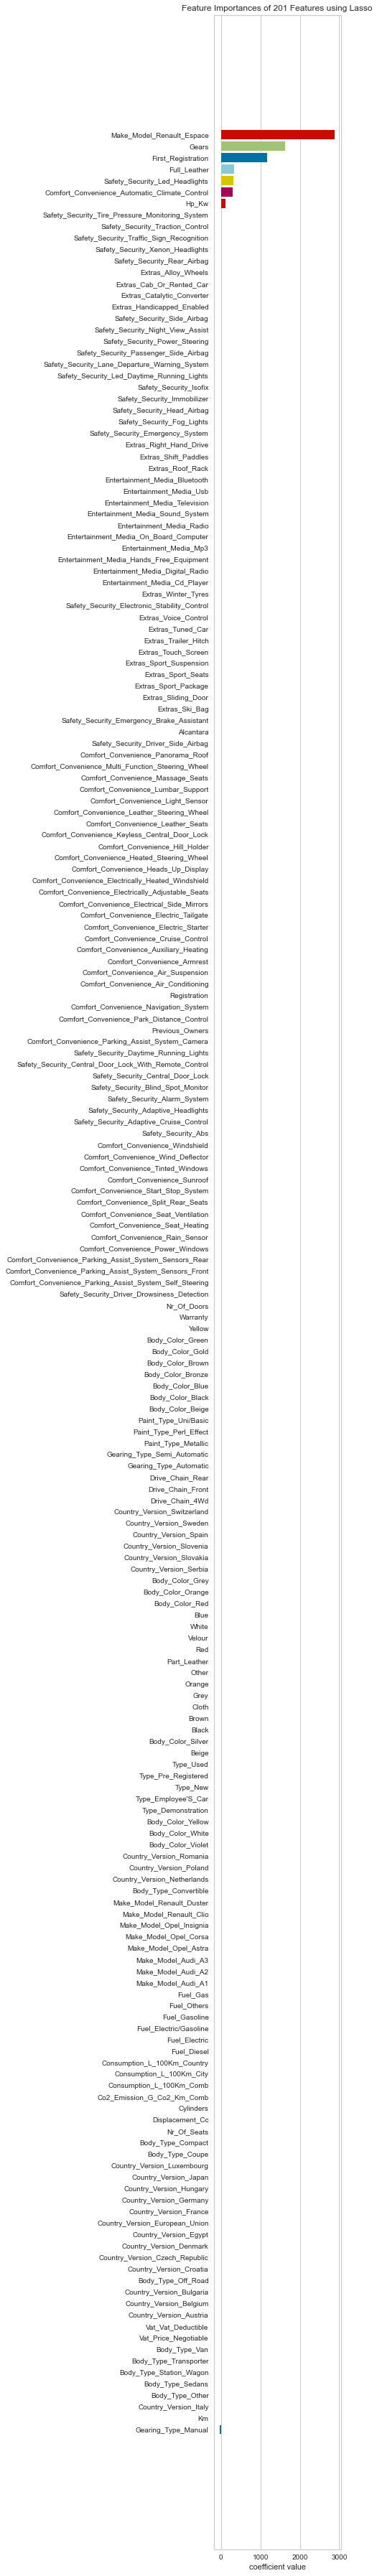

In [79]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))
viz.fit(X_train, y_train)
viz.show()

**Saving sci-kit learn model**

In [94]:
X=df[["hp_kw", "first_registration", "km", "make_model_audi_a1","make_model_audi_a2", 
      "make_model_audi_a3","make_model_opel_astra", "make_model_opel_corsa","make_model_opel_insignia",
      "make_model_renault_clio","make_model_renault_duster","make_model_renault_espace"]]
y=df["price"]

In [92]:
X.head()

,hp_kw,first_registration,km,make_model_audi_a1,make_model_audi_a2,make_model_audi_a3,make_model_opel_astra,make_model_opel_corsa,make_model_opel_insignia,make_model_renault_clio,make_model_renault_duster,make_model_renault_espace
0,66,2016,56013,1,0,0,0,0,0,0,0,0
1,141,2017,80000,1,0,0,0,0,0,0,0,0
2,85,2016,83450,1,0,0,0,0,0,0,0,0
3,66,2016,73000,1,0,0,0,0,0,0,0,0
4,66,2016,16200,1,0,0,0,0,0,0,0,0


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8057563899694534 
 mae: 2213.6944780840377 
 mse: 9712474.42899841 
 rmse: 3116.4843059124187


In [96]:
import pickle
pickle.dump(lm, open("saved_model", 'wb'))
output_model = pickle.load(open("saved_model", "rb"))

In [101]:
my_dict = {
    "hp_kw": 200,
    "first_registration": 2017,
    "km": 100000,
    "make_model": 'audi_a3'
}
df2 = pd.DataFrame.from_dict([my_dict])
df2.head()

,hp_kw,first_registration,km,make_model
0,200,2017,100000,audi_a3


In [102]:
X.columns

Index(['hp_kw', 'first_registration', 'km', 'make_model_audi_a1',
       'make_model_audi_a2', 'make_model_audi_a3', 'make_model_opel_astra',
       'make_model_opel_corsa', 'make_model_opel_insignia',
       'make_model_renault_clio', 'make_model_renault_duster',
       'make_model_renault_espace'],
      dtype='object')

In [103]:
df2 = pd.get_dummies(df2).reindex(columns=X.columns, fill_value=0)
df2.head()

,hp_kw,first_registration,km,make_model_audi_a1,make_model_audi_a2,make_model_audi_a3,make_model_opel_astra,make_model_opel_corsa,make_model_opel_insignia,make_model_renault_clio,make_model_renault_duster,make_model_renault_espace
0,200,2017,100000,0,0,1,0,0,0,0,0,0


In [106]:
pred=list(output_model.predict(df2))
pred[0].round(2)

33716.52

**Another Trial**

In [109]:
my_dict = {
    "hp_kw": 100,
    "first_registration": 2018,
    "km": 10000,
    "make_model": 'audi_a3'
}
df2 = pd.DataFrame.from_dict([my_dict])
df2 = pd.get_dummies(df2).reindex(columns=X.columns, fill_value=0)
pred=list(output_model.predict(df2))
pred[0].round(2)

24726.5

Thanks.!